## Исследование коннектомов с помощью вычисления геометрических характеристик
### A Study of Connectomes by Calculating Geometric Characteristics

### Источники: 
1.	Farooq H., Chen Y., Tryphon T.G., Tannenbaum A., Lenglet C. Network Curvature as a Hallmark of Brain Structural Connectivity
2.	Liu S. Synthetic notions of curvature and applications in graph theory
3.	Peyerimhoff, N. Curvature notions on graphs. Leeds summer school

In [1]:
import numpy as np

## Теоретическая часть из [2]

Пусть $G = (V, E)$ - связный неориентированный взвешенный граф. Наличие петель не исключено. Граф (локально) конечен, то есть конечно количество ребер, выходящих из каждой вершины. Степень вершины $d_x$ определяется как $\sum_{y \in V} w_{xy}$ для каждой из вершин $x \in V$.

Кривизна Оливье-Риччи определяется в метрическом пространстве $(X, d)$, где каждой точке $x \in X$ соответствует вероятностная мера $m_x(\cdot)$. Эта структура обозначается как $(X, d, m)$. Но нам достаточно использовать $(V, d, m)$, где $V$ --- множество вершин графа.

Для (локально) конечного графа $G = (V, E)$ определим метрику $d$ на множестве вершин $V$ следующим образом. Для соседних вершин $x, y$, $d(x, y) = 1$. Для различных вершин $x, y$, $d(x, y)$ есть длина кратчайшего пути в графе между ними (количество ребер). Каждой вершине присвоим вероятностную меру $$m_x(y) = \begin{cases} \frac{w_{xy}}{d_x}, \text{ если } y \sim x; \\ 0, \text{ иначе.} \end{cases}$$

Интуитивным представлением может быть random walker, который изначально находится в $x$, а затем выбирает между соседями $x$ с одинаковой вероятностью $\frac{w_{xy}}{d_x}$. 

**Определение.** (Оливье). На $(X, d, m)$ для двух различных точек $x, y \in X$ кривизна (Оливье-)Риччи по $(xy)$ определяется как $$\kappa(x, y) = 1 - \frac{W_1(m_x, m_y)}{d(x, y)}.$$ 

**Замечание.** Перечислим несколько базовых наблюдений о кривизне:
* $\kappa(x, y) \leq 1$
* Определение можно переписать следующим образом: $W_1(m_x, m_y) = d(x, y)(1 - \kappa(x, y))$
* Если $k$ --- нижняя грань $\kappa(x,y)$, то есть $\kappa(x, y) \geq k$, то из этого следует неравенство $W_1(m_x, m_y) \leq (1-k)d(x, y)$.




### Программа-аналог, описанная в [3]
находится по ссылке: http://www.maths.dur.ac.uk/~dma0np/epsrc2013/software/david_cushing_2/graphcurv.html

Отличается тем, что находит много видов кривизны, но, видимо, только по графам, которые юзер рисует, а матрицу загрузить некуда. Веса, судя по интерфейсу и help, тоже не задаются, все подсчеты по матрице смежности из 0 и 1.

### TODO: 
Что нужно сделать – реализовать вычисление кривизны графа двумя способами:

a) если матрица инцидентности задана с действительными весами, и мы ее такой оставляем

b) если значения округляются (от 0,65 типа ребро есть, ставим 1, иначе 0).

### 1. Чтение матрицы инцидентности графа

In [2]:
# вариант с чтением из консоли, для тестирования наглядно
N = int(input("Введите количество вершин в графе: ")) # размер матрицы

M = np.zeros(shape = (N, N), dtype = float)
nums = list(map(float, input().split()))
for i in range(N):
    for j in range(N):
        M[i][j] = nums[i * N + j]
print(M)

# 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0

Введите количество вершин в графе: 9
0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
[[0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [3]:
# вариант с файловым вводом, для бОльших данных
# Пока что взяла просто какую-то симметричную матрицу небольшого размера, чтобы смотреть, как работают методы.
file = open("data.txt", "r")
data = []
for line in file:
    nums = list(map(float, line.split()))
    data.append(nums)

M = np.array(data)
N = M.shape[0]
print(M)

[[0.1  0.2  0.3  0.4  0.5 ]
 [0.2  0.6  0.7  0.2  1.  ]
 [0.3  0.7  0.   0.4  0.3 ]
 [0.4  0.2  0.4  0.5  0.7 ]
 [0.5  1.   0.3  0.7  0.57]]


Округлим значения в матрице: для значений, не меньших 0.65, поменяем на 1, иначе оставим 0.

In [3]:
def my_round(M, N):
    M_rounded = np.zeros(shape = (N, N), dtype = float)
    for i in range(N):
        for j in range(N):
            if M[i][j] >= 0.1:
                M_rounded[i][j] = 1
    return M_rounded

### 2. Вычислим кривизну Оливье-Риччи:


Метод для вычисления степени вершины по формуле (параметры - матрица, ее размер и номер вершины от 1 до $N$):
    $$d_x = \sum_{y \in V} w_{xy}$$
    
Эта же величина называется *node strength* в [1].

In [4]:
print(M)

[[0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
def degree(M, N, index):
    d = 0.0
    for j in range(N):
        d += M[index][j]
    return d

In [7]:
for i in range(5):
    print(degree(M, 5, i))

2.0
2.0
3.0
2.0
1.0


Метод для вычисления попарных расстояний $d(x, y)$ между вершинами графа. Используется алгоритм Флойда. Граф должен быть без петель (это надо уточнить). Должно хватать замены диагональных элементов на нули, так как петля с положительным расстоянием не может повлиять на кратчайший путь (очевидно?)

In [8]:
def distances(M, N):
    d = np.array(M)
    for i in range(N):
        for j in range(N):
            if d[i][j] != 0:
                d[i][j] = 1
            else:
                d[i][j] = np.inf
        d[i][i] = 0
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d[i][j] = min(d[i][j], d[i][k] + d[k][j])
    return d

In [9]:
def distances_w(M, N):
    # подготовка матрицы
    d = np.array(M)
    for i in range(N):
        for j in range(N):
            if d[i][j] == 0:
                d[i][j] = np.inf
        d[i][i] = 0
    for k in range(N):
        for i in range(N):
                d[i][j] = min(d[i][j], d[i][k] + d[k][j])
    return d

In [10]:
d = distances_w(M, 9)
d

array([[ 0.,  1.,  1., inf, inf, inf, inf, inf, inf],
       [ 1.,  0.,  1., inf, inf, inf, inf, inf, inf],
       [ 1.,  1.,  0.,  1., inf, inf, inf, inf,  2.],
       [inf, inf,  1.,  0.,  1.,  1.,  1.,  1.,  1.],
       [inf, inf, inf,  1.,  0., inf, inf, inf,  2.],
       [inf, inf, inf,  1., inf,  0., inf,  1.,  2.],
       [inf, inf, inf,  1., inf, inf,  0., inf,  2.],
       [inf, inf, inf,  1., inf,  1., inf,  0.,  2.],
       [inf, inf, inf,  1., inf, inf, inf, inf,  0.]])

In [11]:
M # проверка, что матрица не меняется после применения методов

array([[0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.]])

Метод для вычисления $m_x(y)$. Случай, когда вершины не соединены, не нужно рассматривать отдельно, так как граф связный, то есть это равносильно тому, что получится 0 в числителе дроби, а значит и все ее значение будет 0, что соответствует определению.

In [12]:
def get_m(M, N):
    M_1 = np.zeros(shape = (N, N), dtype = float)
    for i in range(N):
        d = degree(M, i)
        for j in range(N):
            if M[i][j] != 0:
                M_1[i][j] = M[i][j] / d
            else:
                M_1[i][j] = 0
    return M_1

In [13]:
m = get_m(M)
m

TypeError: get_m() missing 1 required positional argument: 'N'

Метод для вычисления кривизны графа:
кривизна (Оливье-)Риччи по $(xy)$ определяется как $$\kappa(x, y) = 1 - \frac{W_1(m_x, m_y)}{d(x, y)}.$$ 
Проверка на наличие ребра не нужна, т.к. в связном графе все расстояния $d(x, y)$ получаются больше 0.

$W_1$ - "транспортное" расстояние (Вассерштейна), см. *Optimal transport problem*, но можно просто взять библиотечную функцию.

#### UPD: нет, просто взять библиотечную scipy.stats.wasserstein_distance() не получилось, т.к. по факту известен только ее optional аргумент weights, но не основной. Поэтому написана своя $w_1$ при помощи библиотечного линейного программирования

In [14]:
from scipy.optimize import linprog

In [15]:
def w1(M, N, m, d, i, j, p=0):
    #m = get_m_p(M, p)
    #d = distances(M)
    nb_i = []
    nb_j = []
    for nb in range(N):
        if m[i][nb] > 0.0:
            nb_i.append(nb)
        if m[j][nb] > 0.0:
            nb_j.append(nb)
    c = np.zeros(len(nb_i) * len(nb_j))
    A_eq = np.zeros(shape=(len(nb_i) + len(nb_j), len(nb_i) * len(nb_j)))
    b_eq = np.zeros(len(nb_i) + len(nb_j))

    for nb_idx_i in range(len(nb_i)):
        b_eq[nb_idx_i] = m[i][nb_i[nb_idx_i]]
        for nb_idx_j in range(len(nb_j)):
            c[nb_idx_i * len(nb_j) + nb_idx_j] = d[nb_i[nb_idx_i]][nb_j[nb_idx_j]]
            A_eq[nb_idx_i][nb_idx_i * len(nb_j) + nb_idx_j] = 1.0
            A_eq[len(nb_i) + nb_idx_j][nb_idx_i * len(nb_j) + nb_idx_j] = 1.0

    for nb_idx_j in range(len(nb_j)):
        b_eq[len(nb_i) + nb_idx_j] = m[j][nb_j[nb_idx_j]]

    bounds = [(0, 1)] * len(c)
    
    return linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds).fun

In [16]:
def curvature(M, N, m, d):
    #m = get_m(M)
    #d = distances(M)
    K = np.zeros(shape = (N, N), dtype=float)
    arr = [1 for i in range(N)]
    arr0 = [0 for i in range(N)]
    for i in range(N):
        for j in range(N):
            if M[i][j] != 0 and i != j:
                K[i][j] = 1 - w1(M, i, j) / d[i][j]
    return np.around(K, decimals=6)

(Скалярная) кривизна вершины (*(scalar) node curvature*) определяется в [1] как сумма значений кривизны всех ребер, выходящих из нее: $$\kappa_x = \sum_{y \in V} \kappa(x, y)$$

Опять же, проверка на наличие ребра в методе пропущена, т.к. кривизна у отсутствующего ребра равна 0.

In [17]:
def node_curvature(M, N, K, index):
    cur = 0.0
    for i in range(N):
        if i != index:
            cur += K[index][i]
            
    return cur

In [18]:
c = node_curvature(M, 3)
c

TypeError: node_curvature() missing 2 required positional arguments: 'K' and 'index'

Также в [1] отмечают, что может рассматриваться еще и "взвешенная" версия определения кривизны в вершине, а именно 
$$\bar{\kappa}_x =  \sum_{y \in V} \frac{w_{xy}}{d_x} \kappa(x, y)$$

Посчитаю и ее

In [19]:
def node_curvature_weighted(M, N, K, index):
    d = degree(M, index)
    cur = 0.0
    for i in range(N):
        if i != index:
            cur += K[index][i]
    cur = cur * (M[index][i] / d)
    return cur

In [20]:
c = node_curvature_weighted(M, 3)
c

TypeError: node_curvature_weighted() missing 2 required positional arguments: 'K' and 'index'

В [1] и [2] также упоминается понятие *local clustering coefficient* - коэффициент кластеризации, выражающий степень связанности между собой соседних с данной вершин. Он вычисляется как частное ребер, соединяющих соседей вершины, и максимального их количества.

$$ c(x) = \frac{\text{number of edges between neighbors of } x}{\text{number of possible existing edges between neighbors of } x } = \frac{1}{d_x(d_x - 1)} \sum_{y, y\sim x} \#(x, y) $$

In [21]:
def lcc(M, N, index):
    e = 0
    neigh = []
    for i in range(N):
        if i != index and M[index][i] != 0:
            neigh.append(i)
    for x in neigh:
        for y in neigh:
            if x != y and M[x][y] != 0:
                e += 1
    print(e)
    print(len(neigh))
    return e / ((len(neigh) - 1) * len(neigh))

In [22]:
coef = lcc(M, 3)
coef

TypeError: lcc() missing 1 required positional argument: 'index'

### Curvature with idleness

В [3] дается определение кривизны Оливье-Риччи с параметром $p$ бездействия (*idleness*):
$$ \kappa_p (x, y) = 1 - \frac{W_1(m_x^p, m_y^p)}{d(x, y)}, $$
где $$m_x^p(y) = \begin{cases} p, \text{ если } x = y, \\ \frac{1 - p}{|x|}, \text{ если } x \sim y, \\ 0 \text{ иначе.}\end{cases}, $$ а $|x|$ обозначает степень вершины $x$, равную количеству выходящих из нее ребер (в отличие от $d_x$, которая зависит от весов ребер).

Чтобы вычислять такую кривизну, придется пересчитать степени вершины и вероятностную меру $m_x ^ p$.

#### Откуда все это берется?

Для определения кривизны Оливье-Риччи были введены вероятностные меры, представляющие (метрические) шары вокруг вершин графа. Эти шары должны быть маленькими, но не тривиальными (т.е. радиусы -- небольшие положительные числа). Так как расстояния выражены целыми числами (считаются по количеству ребер), то выбирается радиус 1, что означает, что шар содержит саму центральную вершину $x\in V$, а также всех ее соседей $y \in V \, : \, y \sim x$. Тогда множество задействованных вершин обозначается как $B_1(x) = \{ y \in V \, | \, d(x, y) \leq 1 \}$. Чтобы разрешить некоторую "гибкость" в связанной с $B_1(x)$ вероятностной мерой, введем параметр $p \in [0, 1]$, который равен вероятности в центре, для каждой из соседних вершин тогда получим веростность $\frac{1 - p}{|x|}$. Эти вероятности могут рассматриваться как вероятности перехода из вершины $x$ в случайном блуждании, и тогда $p$ - вероятность, что перехода не было. Поэтому он называется *idleness parameter*.

In [23]:
def degree_unw(M, N, index):
    d = 0.0
    for j in range(N):
        if index != j and M[index][j] > 0:
            d += 1
    return d

In [24]:
def degree(M, N, index):
    d = 0.0
    for j in range(N):
        if index != j:
            d += M[index][j]
    return d

In [25]:
def get_m_p(M, N, p=0):
    M_1 = np.zeros(shape = (N, N), dtype = float)
    for i in range(N):
        d = degree(M, N, i)
        for j in range(N):
            if i == j:
                M_1[i][j] = p
            elif M[i][j] != 0:
                M_1[i][j] = (1 - p) * M[i][j] / d
            else:
                M_1[i][j] = 0
    return M_1

In [26]:
def curvature_with_idleness(M, p=0):
    N = M.shape[0]
    m = get_m_p(M, N, p)
    d = distances(M, N)
    K = np.zeros(shape = (N, N), dtype = float)
    for i in range(N):
        for j in range(i):
            if M[i][j] != 0:
                K[i][j] = 1 - (w1(M, N, m, d, i, j, p) / d[i][j])
                K[j][i] = K[i][j]
    return np.around(K, decimals=6)

In [27]:
N = M.shape[0]

K = curvature(M, N, m, d)
K

NameError: name 'm' is not defined

In [28]:
K = curvature_with_idleness(M, 0.01)
K

C:\Users\annapershina\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\_linprog_util.py:763: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning)


array([[ 0.   ,  0.515,  0.35 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.515,  0.   ,  0.35 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.35 ,  0.35 ,  0.   , -0.99 ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   , -0.99 ,  0.   ,  0.02 ,  0.01 ,  0.02 ,  0.01 ,
         0.02 ],
       [ 0.   ,  0.   ,  0.   ,  0.02 ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.01 ,  0.   ,  0.   ,  0.   ,  0.515,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.02 ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.01 ,  0.   ,  0.515,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.02 ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ]])

In [29]:
def node_curvature_with_idleness(N, K, index, p=0):
    cur = 0.0
    for i in range(N):
        if i != index:
            cur += K[index][i]
    return cur

### Graph curvature

#### Кривизной целого графа назовем сумму кривизны по вершинам.

In [30]:
def graph_curvature(M):
    N = M.shape[0]
    cur = 0
    for i in range(N):
        cur += node_curvature(M, i)
    return cur


In [31]:
graph_curvature(M)

TypeError: node_curvature() missing 2 required positional arguments: 'K' and 'index'

In [32]:
def graph_curvature_with_idleness(M, p=0):
    N = M.shape[0]
    cur = 0
    for i in range(N):
        cur += node_curvature_with_idleness(M, i, p)
    return cur

In [33]:
graph_curvature_with_idleness(M, 0.5)

TypeError: only integer scalar arrays can be converted to a scalar index

In [34]:
graph_curvature_with_idleness(M, 0.8)

TypeError: only integer scalar arrays can be converted to a scalar index

In [35]:
graph_curvature_with_idleness(M, 0.1)

TypeError: only integer scalar arrays can be converted to a scalar index

In [36]:
graph_curvature_with_idleness(M, 0)

TypeError: only integer scalar arrays can be converted to a scalar index

### Отрисовка графов

In [37]:
import matplotlib.pyplot as plt
import networkx as nx

In [47]:
def draw_graph(M, K = [[]], p=0):
    N = M.shape[0]
    if K == [[]]:
        K = curvature_with_idleness(M, p)
    plt.figure(figsize=(max(2*N - 15, N), max(2*N - 15, N)))
    G = nx.Graph()
    labels = {}
    for i in range(N):
        labels[i] = (str(i + 1))
    G.add_nodes_from([i for i in range(0, N)])
    for i in range(0, N):
        for j in range(i, N):
            if M[i][j] != 0:
                G.add_edge(i, j, weight = M[i][j])
    pos = nx.circular_layout(G)
    for i in range(0, N):
        cur = node_curvature_with_idleness(N, K, i, p)
        if cur > 0:
            nx.draw_networkx_nodes(G, pos,
                       nodelist=[i],
                       node_color='r',
                       node_size=500,
                       alpha=1)
        elif cur < 0:
            nx.draw_networkx_nodes(G, pos,
                       nodelist=[i],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)
        else:
            nx.draw_networkx_nodes(G, pos,
                       nodelist=[i],
                       node_size=500,
                       alpha=0.8)
        for j in range(i, N):
            cur = K[i][j]
            if M[i][j] != 0 and i != j:
                if cur > 0:
                    nx.draw_networkx_edges(G, pos, edgelist = [(i, j)], alpha=0.5, edge_color = 'r')
                    edge_labels = {(i, j) : str(cur)[:4]}
                    nx.draw_networkx_edge_labels(G, pos, edge_labels)
                elif cur < 0:
                    nx.draw_networkx_edges(G, pos, edgelist = [(i, j)], alpha=0.5, edge_color = 'b')
                    edge_labels = {(i, j) : str(cur)[:5]}
                    nx.draw_networkx_edge_labels(G, pos, edge_labels)
                else:
                    nx.draw_networkx_edges(G, pos, edgelist = [(i, j)], alpha=0.5)
                    edge_labels = {(i, j) : '0'}
                    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    nx.draw_networkx_labels(G, pos, labels, font_size=16)
    plt.axis('off')
    plt.show()

C:\Users\annapershina\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


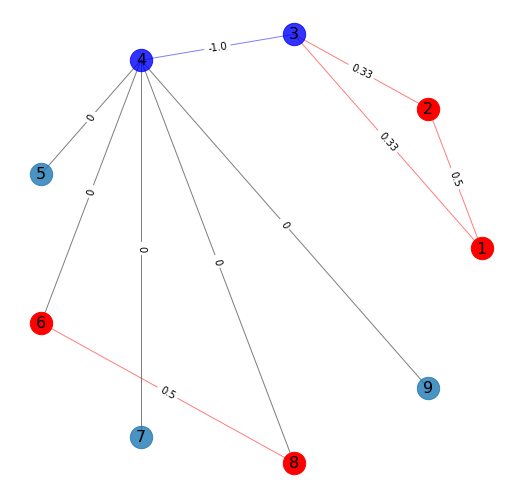

In [48]:
draw_graph(M)

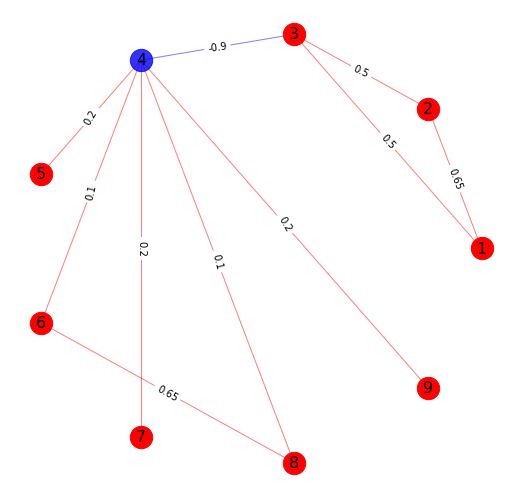

In [50]:
draw_graph(M, p=0.1)

In [ ]:
draw_graph(M, 0.2)

In [39]:
draw_graph(M, 0.5)

NameError: name 'draw_graph' is not defined

In [40]:
draw_graph(M, K = None, p=1)

NameError: name 'draw_graph' is not defined

### Теперь какой-нибудь пример графа, где есть и отрицательная кривизна.

In [43]:
# вариант с чтением из консоли, для тестирования наглядно
N = int(input("Введите количество вершин в графе: ")) # размер матрицы

M2 = np.zeros(shape = (N, N), dtype = float)
nums = list(map(float, input().split()))
for i in range(N):
    for j in range(N):
        M2[i][j] = nums[i * N + j]
print(M2)

# 0  1  1  0  0     1  0  1  1  0     1  1  0  0  0     0  1  0  0  1     0  0  0  1  0    

##  0  1  1  1  0  0  0  0  0      1  0  1  0  0  0  0  0  0      1  1  0  0  0  0  0  0  0      1  0  0  0  1  1  1  1  1      0  0  0  1  0  0  0  0  0      0  0  0  1  0  0  0  0  0      0  0  0  1  0  0  0  0  0      0  0  0  1  0  0  0  0  0      0  0  0  1  0  0  0  0  0    

Введите количество вершин в графе: 10
0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 
[[0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 1. 1. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [ ]:
# 10
# 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 

In [138]:
K2 = curvature_with_idleness(M2)
K2

1 0
2 0
2 1
3 0
3 2
4 0
4 1
4 2
4 3
5 1
6 1
7 2
8 7
9 7


array([[ 0.      ,  0.2     ,  0.6     ,  0.5     ,  0.75    ,  0.5     ,
         0.5     , -0.041667,  0.416667,  0.416667],
       [ 0.2     ,  0.      , -0.      ,  0.6     ,  0.2     ,  0.      ,
         0.      , -0.266667,  0.266667,  0.266667],
       [ 0.6     , -0.      ,  0.      ,  0.4     ,  0.6     ,  0.4     ,
         0.4     , -0.933333,  0.2     ,  0.2     ],
       [ 0.5     ,  0.6     ,  0.4     ,  0.      ,  0.5     ,  0.666667,
         0.666667, -0.      ,  0.444444,  0.444444],
       [ 0.75    ,  0.2     ,  0.6     ,  0.5     ,  0.      ,  0.5     ,
         0.5     , -0.041667,  0.416667,  0.416667],
       [ 0.5     ,  0.      ,  0.4     ,  0.666667,  0.5     ,  0.      ,
         1.      ,  0.222222,  0.5     ,  0.5     ],
       [ 0.5     ,  0.      ,  0.4     ,  0.666667,  0.5     ,  1.      ,
         0.      ,  0.222222,  0.5     ,  0.5     ],
       [-0.041667, -0.266667, -0.933333, -0.      , -0.041667,  0.222222,
         0.222222,  0.      ,  0.    

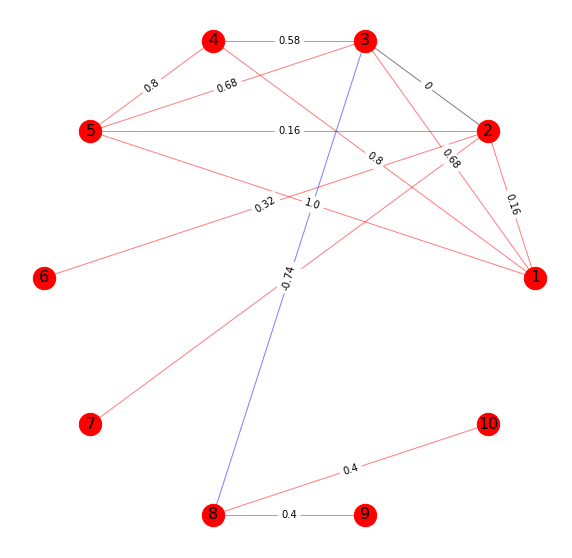

In [155]:
draw_graph(M2, 10, K2)

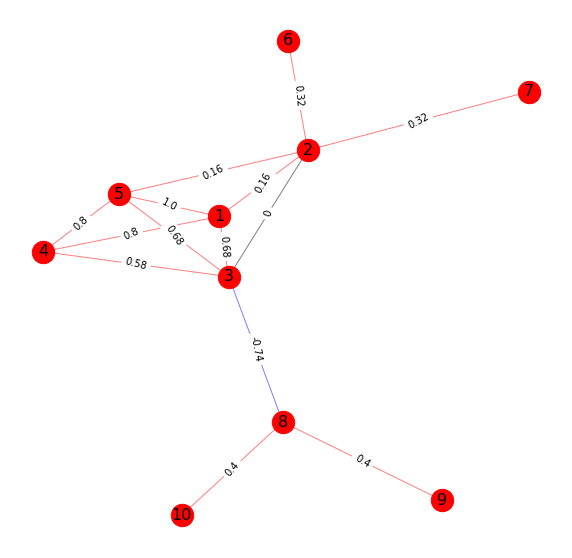

In [45]:
draw_graph(M2, 0.2)

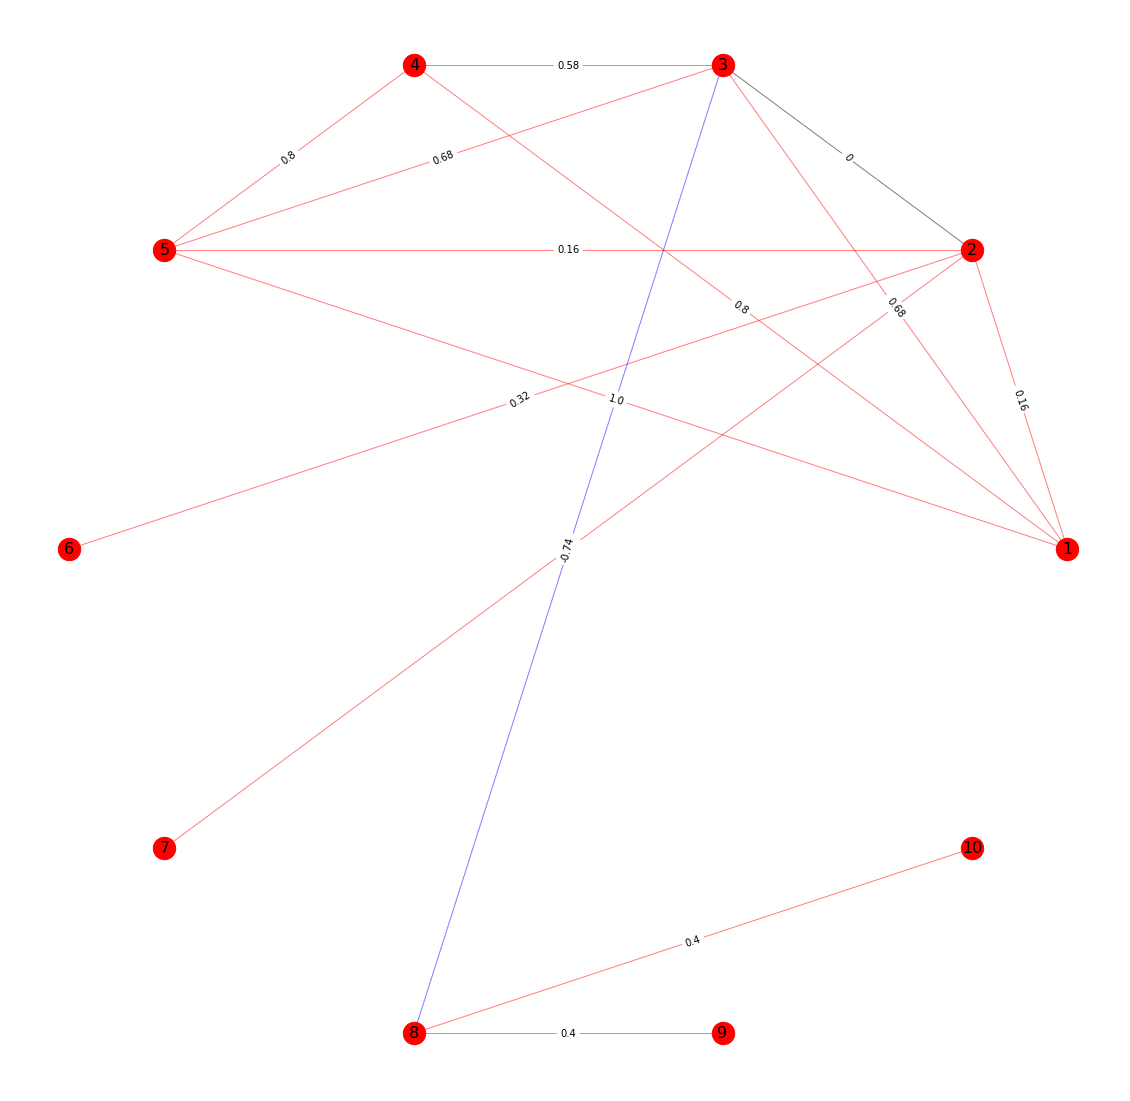

In [167]:
K2 = curvature_with_idleness(M2, 0.2)
draw_graph(M2, 10, K2, 0.2)

In [170]:
draw_graph(M2)

TypeError: draw_graph() missing 2 required positional arguments: 'N' and 'K'

### Работа с данными

https://drive.google.com/drive/folders/1ODNYmNxidTCbSMgOkYUwB73Oy2PIg8K-

Данные представлены в формате .npy - бинарные массивы для numpy

In [76]:
import numpy as np
for i in range(57, 58):
    data = np.load('pat_' + str(i) + '.npy')
    print(data.shape)

(39, 39)


In [135]:
count = 0
for i in range(0, data.shape[0]):
    for j in range(i):
        if data[i][j] != 0:
            count += 1
count

453

In [134]:
M_ex = data
for i in range(0, M_ex.shape[0]):
    for j in range(i):
        if M_ex[i][j] != 0:
            print(i, j)

1 0
2 0
2 1
3 1
4 0
4 1
4 2
4 3
5 2
6 1
6 2
6 3
6 4
7 1
7 3
8 0
8 1
8 2
8 3
8 4
9 0
9 1
9 3
9 4
9 6
9 7
9 8
10 1
10 3
10 4
10 6
10 7
10 8
10 9
11 0
11 1
11 2
11 3
11 4
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 6
12 8
12 9
12 10
12 11
13 1
13 2
13 3
13 4
13 8
13 9
13 10
13 11
13 12
14 0
14 5
14 7
15 0
15 1
15 2
15 3
15 4
15 8
15 9
15 10
15 11
15 12
15 13
16 0
16 2
16 5
16 14
17 0
17 1
17 2
17 3
17 4
17 6
17 8
17 9
17 10
17 11
17 12
17 13
17 15
18 0
18 2
18 4
18 5
18 8
18 13
18 14
18 16
19 0
19 1
19 2
19 4
19 5
19 6
19 8
19 9
19 10
19 11
19 12
19 13
19 15
19 16
19 17
19 18
20 0
20 2
20 4
20 5
20 6
20 12
20 13
20 14
20 16
20 17
20 18
20 19
21 1
21 2
21 3
21 4
21 6
21 8
21 9
21 10
21 11
21 12
21 13
21 15
21 17
21 19
21 20
22 0
22 1
22 3
22 4
22 7
22 8
22 9
22 10
22 11
22 12
22 13
22 15
22 17
22 21
23 0
23 1
23 3
23 4
23 6
23 7
23 8
23 9
23 10
23 11
23 12
23 13
23 15
23 17
23 19
23 21
23 22
24 0
24 1
24 3
24 4
24 6
24 7
24 8
24 9
24 10
24 11
24 12
24 13
24 15
24 17
24 19
24 21
24 22


In [67]:
my_round(M_ex)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [130]:
K = curvature_with_idleness(M_ex)
K

1 0
2 0
2 1
3 1
4 0
4 1
4 2
4 3
5 2
6 1
6 2
6 3
6 4
7 1
7 3
8 0
8 1
8 2
8 3
8 4
9 0
9 1
9 3
9 4
9 6
9 7
9 8
10 1
10 3
10 4
10 6
10 7
10 8
10 9
11 0
11 1
11 2
11 3
11 4
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 6
12 8
12 9
12 10
12 11
13 1
13 2
13 3
13 4
13 8
13 9
13 10
13 11
13 12
14 0
14 5
14 7
15 0
15 1
15 2
15 3
15 4
15 8
15 9
15 10
15 11
15 12
15 13
16 0
16 2
16 5
16 14
17 0
17 1
17 2
17 3
17 4
17 6
17 8
17 9
17 10
17 11
17 12
17 13
17 15
18 0
18 2
18 4
18 5
18 8
18 13
18 14
18 16
19 0
19 1
19 2
19 4
19 5
19 6
19 8
19 9
19 10
19 11
19 12
19 13
19 15
19 16
19 17
19 18
20 0
20 2
20 4
20 5
20 6
20 12
20 13
20 14
20 16
20 17
20 18
20 19
21 1
21 2
21 3
21 4
21 6
21 8
21 9
21 10
21 11
21 12
21 13
21 15
21 17
21 19
21 20
22 0
22 1
22 3
22 4
22 7
22 8
22 9
22 10
22 11
22 12
22 13
22 15
22 17
22 21
23 0
23 1
23 3
23 4
23 6
23 7
23 8
23 9
23 10
23 11
23 12
23 13
23 15
23 17
23 19
23 21
23 22
24 0
24 1
24 3
24 4
24 6
24 7
24 8
24 9
24 10
24 11
24 12
24 13
24 15
24 17
24 19
24 21
24 22


array([[0.      , 0.336594, 0.380578, ..., 0.477534, 0.560431, 0.330866],
       [0.336594, 0.      , 0.076086, ..., 0.272159, 0.383492, 0.869711],
       [0.380578, 0.076086, 0.      , ..., 0.238941, 0.522219, 0.080747],
       ...,
       [0.477534, 0.272159, 0.238941, ..., 0.      , 0.582226, 0.269999],
       [0.560431, 0.383492, 0.522219, ..., 0.582226, 0.      , 0.38855 ],
       [0.330866, 0.869711, 0.080747, ..., 0.269999, 0.38855 , 0.      ]])

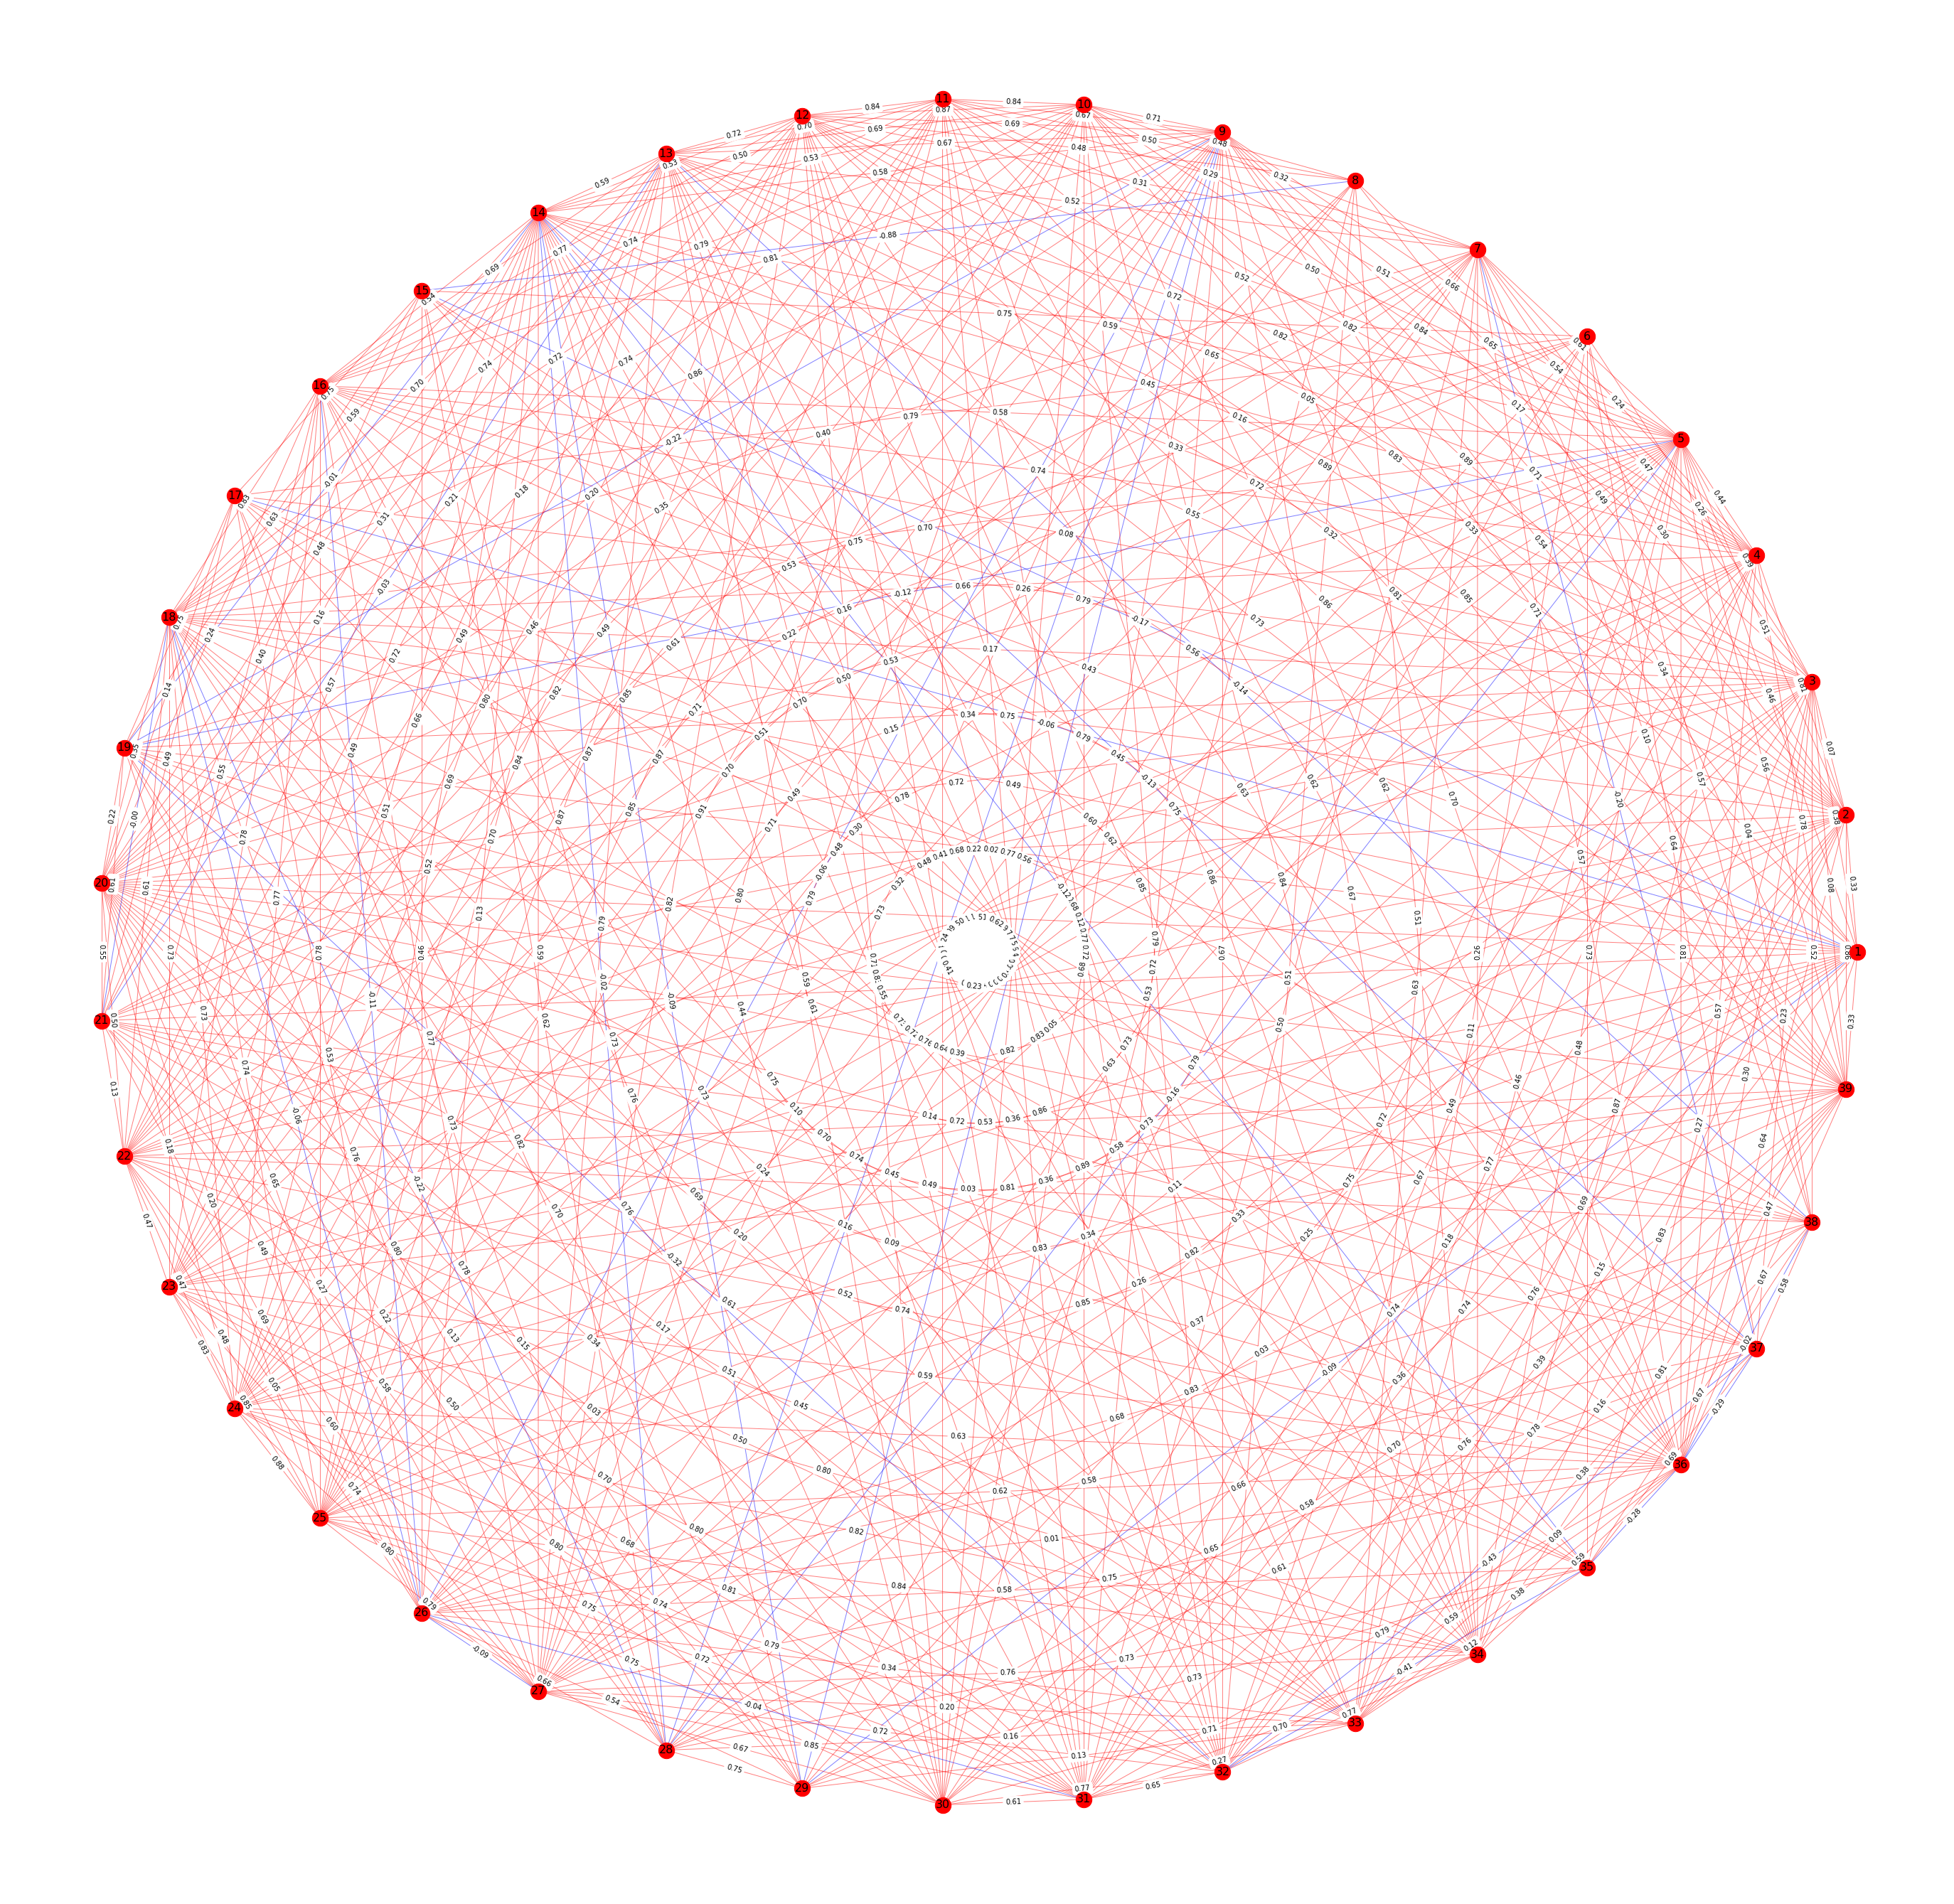

In [165]:
draw_graph(M_ex, 39, K_new)

In [146]:
K_new = curvature_with_idleness(M_ex)

In [147]:
K_new

array([[0.      , 0.336594, 0.380578, ..., 0.      , 0.      , 0.330866],
       [0.336594, 0.      , 0.076086, ..., 0.      , 0.      , 0.869711],
       [0.380578, 0.076086, 0.      , ..., 0.238941, 0.522219, 0.080747],
       ...,
       [0.      , 0.      , 0.238941, ..., 0.      , 0.582226, 0.      ],
       [0.      , 0.      , 0.522219, ..., 0.582226, 0.      , 0.      ],
       [0.330866, 0.869711, 0.080747, ..., 0.      , 0.      , 0.      ]])

In [151]:
count = 0
for i in range(0, K.shape[0]):
    for j in range(i):
        if K[i][j] != 0:
            count += 1
count

741

In [51]:
ctrl = np.load('ctrl_57.npy')

In [58]:
ctrl

array([[0.        , 0.22081191, 0.        , ..., 0.42133339, 0.44258885,
        0.        ],
       [0.22081191, 0.        , 0.37385577, ..., 0.        , 0.50325631,
        0.42163368],
       [0.        , 0.37385577, 0.        , ..., 0.        , 0.31456221,
        0.62821337],
       ...,
       [0.42133339, 0.        , 0.        , ..., 0.        , 0.06125999,
        0.        ],
       [0.44258885, 0.50325631, 0.31456221, ..., 0.06125999, 0.        ,
        0.30768114],
       [0.        , 0.42163368, 0.62821337, ..., 0.        , 0.30768114,
        0.        ]])

In [55]:
intime = np.load('patients_all_intime.npy')
intime.shape

(69, 16, 39, 39)

In [56]:
intime = np.load('controls_all_intime.npy')
intime.shape

(82, 16, 39, 39)